In [1]:
import numpy as np
from scipy import misc
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#functions

In [3]:
def load_mnist():
    # Loads the MNIST dataset from png images
 
    NUM_LABELS = 10        
    # create list of image objects
    test_images = []
    test_labels = []    
    
    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Test/" + str(label) + "/*.png"):
            image = misc.imread(image_path)
            test_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]    
            letter[label] = 1
            test_labels.append(letter)  
            
    # create list of image objects
    train_images = []
    train_labels = []    
    
    for label in range(NUM_LABELS):
        for image_path in glob.glob("MNIST/Train/" + str(label) + "/*.png"):
            image = misc.imread(image_path)
            train_images.append(image)
            letter = [0 for _ in range(0,NUM_LABELS)]    
            letter[label] = 1
            train_labels.append(letter)                  
            
    X_train= np.array(train_images).reshape(-1,784)/255.0
    Y_train= np.array(train_labels)
    X_test= np.array(test_images).reshape(-1,784)/255.0
    Y_test= np.array(test_labels)
    
    return X_train, Y_train, X_test, Y_test


## Read MNIST data

In [4]:
X_train, Y_train, X_test, Y_test=load_mnist()

/home/rodrigo/miniconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/home/rodrigo/miniconda3/envs/work/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


# Task 1.1
---

In [7]:
from keras.layers import Activation, Dense, Dropout
from keras.activations import relu,softmax,selu,linear,sigmoid
from keras.models import Model,Sequential
from keras.backend import clear_session
from keras.optimizers import SGD, Adam

In [71]:
clear_session()

In [72]:
model1 = Sequential()
model1.add(Dense(200, input_shape=(784,),activation='sigmoid'))
model1.add(Dense(10, activation = 'softmax'))

In [73]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [74]:
model1.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.5,decay=0.01), metrics=['accuracy'])
hist1 = model1.fit(X_train, Y_train, epochs=40, batch_size=100,validation_data=[X_test,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 2s 41us/step - loss: 0.5563 - acc: 0.8496 - val_loss: 0.3642 - val_acc: 0.9018
Epoch 2/40
60000/60000 [==============================] - 2s 36us/step - loss: 0.3640 - acc: 0.8975 - val_loss: 0.3368 - val_acc: 0.9064
Epoch 3/40
60000/60000 [==============================] - 3s 55us/step - loss: 0.3449 - acc: 0.9022 - val_loss: 0.3247 - val_acc: 0.9090
Epoch 4/40
60000/60000 [==============================] - 4s 61us/step - loss: 0.3352 - acc: 0.9048 - val_loss: 0.3181 - val_acc: 0.9105
Epoch 5/40
60000/60000 [==============================] - 4s 64us/step - loss: 0.3289 - acc: 0.9062 - val_loss: 0.3139 - val_acc: 0.9114
Epoch 6/40
60000/60000 [==============================] - 4s 72us/step - loss: 0.3244 - acc: 0.9077 - val_loss: 0.3105 - val_acc: 0.9123
Epoch 7/40
60000/60000 [==============================] - 4s 70us/step - loss: 0.3210 - acc: 0.9083 - val_loss: 0.3074 - val_acc

In [79]:
hist1.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [92]:
#LOSS
plt.figure(dpi=80)
plt.plot(hist1.epoch,hist1.history['loss'],label='Training',c='xkcd:azure')
plt.plot(hist1.epoch,hist1.history['val_loss'],label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend()
plt.savefig("1-1_loss.png",dpi=300)

In [90]:
print('Accuracy on TEST data\n')
score1 = model1.evaluate(X_test, Y_test) 
predictions = model1.predict(X_test)
print('loss ', score1[0])
print('Accuracy ', score1[1])

Accuracy on TEST data

10000/10000 [==============================] - 0s 41us/step
loss  0.28467943077087404
Accuracy  0.9194


In [96]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.savefig("1-1_numbers.png",dpi=300)


# Task 1.2
----

### Reshape images to 28 x 28

In [5]:
X_train_2d=X_train.reshape(-1,28,28,1)
X_test_2d=X_test.reshape(-1,28,28,1)

In [6]:
from keras.layers import Conv2D,ZeroPadding2D,MaxPooling2D,InputLayer,Flatten

Using TensorFlow backend.


In [12]:
clear_session()

In [13]:
model2 = Sequential()
model2.add(InputLayer((28,28,1)))
model2.add(Conv2D(filters=8,kernel_size=3,padding='same',strides=1))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model2.add(Conv2D(filters=16,kernel_size=3,padding='same',strides=1))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model2.add(Conv2D(filters=32,kernel_size=3,padding='same',strides=1))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(10, activation = 'softmax'))

In [14]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          4640      
__________

In [15]:
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1,decay=0.001), metrics=['accuracy'])
hist2 = model2.fit(X_train_2d, Y_train, epochs=50, batch_size=100,validation_data=[X_test_2d,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 19s 323us/step - loss: 0.3434 - acc: 0.8925 - val_loss: 0.0899 - val_acc: 0.9727
Epoch 2/50
60000/60000 [==============================] - 18s 303us/step - loss: 0.0862 - acc: 0.9740 - val_loss: 0.0658 - val_acc: 0.9799
Epoch 3/50
60000/60000 [==============================] - 19s 309us/step - loss: 0.0652 - acc: 0.9800 - val_loss: 0.0550 - val_acc: 0.9829
Epoch 4/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.0552 - acc: 0.9832 - val_loss: 0.0473 - val_acc: 0.9848
Epoch 5/50
60000/60000 [==============================] - 20s 326us/step - loss: 0.0488 - acc: 0.9854 - val_loss: 0.0448 - val_acc: 0.9856
Epoch 6/50
60000/60000 [==============================] - 23s 386us/step - loss: 0.0446 - acc: 0.9865 - val_loss: 0.0409 - val_acc: 0.9864
Epoch 7/50
60000/60000 [==============================] - 20s 337us/step - loss: 0.0410 - acc: 0.9877 - val_loss: 0.

In [16]:
print('Accuracy on TEST data\n')
score2 = model2.evaluate(X_test_2d, Y_test) 
predictions = model2.predict(X_test_2d)
print('loss ', score2[0])
print('Accuracy ', score2[1])

Accuracy on TEST data

10000/10000 [==============================] - 1s 64us/step
loss  0.03567860067683505
Accuracy  0.9894


In [64]:
#LOSS
plt.figure(dpi=80)
plt.plot(hist2.epoch,hist2.history['loss'],label='Training',c='xkcd:azure')
plt.plot(hist2.epoch,hist2.history['val_loss'],label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend()
plt.savefig("1-2_loss.png",dpi=300)

In [67]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.savefig("1-2_numbers.png",dpi=300)


# Task 1.3
---

In [138]:
clear_session()

In [71]:
model3 = Sequential()
model3.add(InputLayer((1,28,28,)))
model3.add(Conv2D(filters=8,kernel_size=3,padding='same',strides=1))
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(filters=16,kernel_size=3,padding='same',strides=1))
model3.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(filters=32,kernel_size=3,padding='same',strides=1))
model3.add(Activation('relu'))
model3.add(Flatten())
model3.add(Dense(10, activation = 'softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 1, 28, 8)          2024      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 14, 8)          0         
_________________________________________________________________
activation_25 (Activation)   (None, 1, 14, 8)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 1, 14, 16)         1168      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 1, 7, 16)          0         
_________________________________________________________________
activation_26 (Activation)   (None, 1, 7, 16)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 1, 7, 32)          4640      
__________

In [72]:
    model3.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.18,decay=0.001), metrics=['accuracy'])
hist3 = model3.fit(X_train_2d, Y_train, epochs=50, batch_size=100,validation_data=[X_test_2d,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.6184 - acc: 0.8075 - val_loss: 0.2089 - val_acc: 0.9338
Epoch 2/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.1903 - acc: 0.9426 - val_loss: 0.1342 - val_acc: 0.9568
Epoch 3/50
60000/60000 [==============================] - 5s 86us/step - loss: 0.1423 - acc: 0.9558 - val_loss: 0.1116 - val_acc: 0.9630
Epoch 4/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.1199 - acc: 0.9629 - val_loss: 0.0983 - val_acc: 0.9666
Epoch 5/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1074 - acc: 0.9666 - val_loss: 0.0891 - val_acc: 0.9704
Epoch 6/50
60000/60000 [==============================] - 3s 52us/step - loss: 0.0992 - acc: 0.9697 - val_loss: 0.0841 - val_acc: 0.9743
Epoch 7/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.0926 - acc: 0.9707 - val_loss: 0.0831 - val_ac

In [73]:
print('Accuracy on TEST data\n')
score3 = model3.evaluate(X_test_2d, Y_test) 
predictions = model3.predict(X_test_2d)
print('loss ', score3[0])
print('Accuracy ', score3[1])

Accuracy on TEST data

10000/10000 [==============================] - 1s 77us/step
loss  0.06090868619121611
Accuracy  0.9808


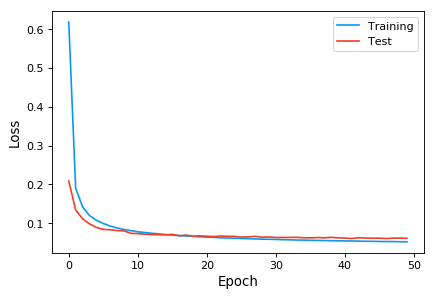

In [74]:
#LOSS
plt.figure(dpi=80)
plt.plot(hist3.epoch,hist3.history['loss'],label='Training',c='xkcd:azure')
plt.plot(hist3.epoch,hist3.history['val_loss'],label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend()
plt.savefig("1-3_loss.png",dpi=300)

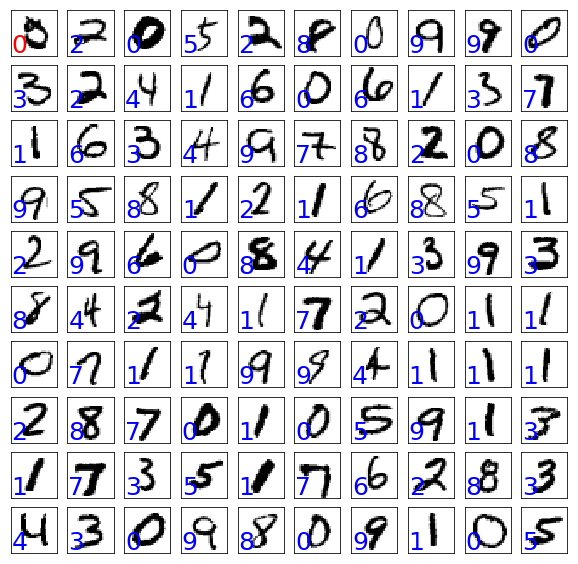

In [75]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.savefig("1-3_numbers.png",dpi=300)


# Task 1.4
---

In [6]:
from keras.optimizers import Adam
import gc

In [87]:
gc.collect()

205

In [88]:
clear_session()

In [89]:
model4 = Sequential()
model4.add(InputLayer((1,28,28,)))
model4.add(Conv2D(filters=8,kernel_size=3,padding='same',strides=1))
model4.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(filters=16,kernel_size=3,padding='same',strides=1))
model4.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(filters=32,kernel_size=3,padding='same',strides=1))
model4.add(Activation('relu'))
model4.add(Flatten())
model4.add(Dense(10, activation = 'softmax'))

model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 28, 8)          2024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 14, 8)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 1, 14, 8)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 14, 16)         1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 16)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 1, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 7, 32)          4640      
__________

In [90]:
model4.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist4 = model4.fit(X_train_2d, Y_train, epochs=50, batch_size=100,validation_data=[X_test_2d,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 84us/step - loss: 0.6325 - acc: 0.8034 - val_loss: 0.2420 - val_acc: 0.9257
Epoch 2/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2152 - acc: 0.9334 - val_loss: 0.1610 - val_acc: 0.9500
Epoch 3/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.1606 - acc: 0.9503 - val_loss: 0.1317 - val_acc: 0.9575
Epoch 4/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.1309 - acc: 0.9600 - val_loss: 0.1149 - val_acc: 0.9615
Epoch 5/50
60000/60000 [==============================] - 5s 85us/step - loss: 0.1122 - acc: 0.9651 - val_loss: 0.1028 - val_acc: 0.9666
Epoch 6/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.0975 - acc: 0.9697 - val_loss: 0.0881 - val_acc: 0.9709
Epoch 7/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.0887 - acc: 0.9719 - val_loss: 0.0843 - val_acc

In [91]:
print('Accuracy on TEST data\n')
score4 = model4.evaluate(X_test_2d, Y_test) 
predictions = model4.predict(X_test_2d)
print('loss ', score4[0])
print('Accuracy ', score4[1])

Accuracy on TEST data

10000/10000 [==============================] - 1s 56us/step
loss  0.07337878777050064
Accuracy  0.982


In [92]:
#LOSS
plt.figure(dpi=80)
plt.plot(hist4.epoch,hist4.history['loss'],label='Training',c='xkcd:azure')
plt.plot(hist4.epoch,hist4.history['val_loss'],label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend()
plt.savefig("1-4_loss.png",dpi=300)

In [93]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.savefig("1-4_numbers.png",dpi=300)


# Task 1.5
---

## variation 1 - BatchNormalization before each Conv

In [18]:
from keras.layers import BatchNormalization
from keras.regularizers import l2,l1

In [19]:
model51 = Sequential()
model51.add(InputLayer((28,28,1)))
model51.add(BatchNormalization())
model51.add(Conv2D(filters=8,kernel_size=4,padding='same',strides=1))
model51.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model51.add(Activation('relu'))
model51.add(BatchNormalization())
model51.add(Conv2D(filters=16,kernel_size=4,padding='same',strides=1))
model51.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model51.add(Activation('relu'))
model51.add(BatchNormalization())
model51.add(Conv2D(filters=32,kernel_size=4,padding='same',strides=1))
model51.add(Activation('relu'))
model51.add(Flatten())
model51.add(Dense(10, activation = 'softmax'))

model51.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
activation_4 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        2064      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
__________

In [181]:
model51.compile(loss='categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy'])
hist51 = model51.fit(X_train_2d, Y_train, epochs=50, batch_size=100,validation_data=[X_test_2d,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 11s 179us/step - loss: 0.2388 - acc: 0.9290 - val_loss: 0.1198 - val_acc: 0.9627
Epoch 2/40
60000/60000 [==============================] - 8s 140us/step - loss: 0.1149 - acc: 0.9655 - val_loss: 0.0971 - val_acc: 0.9692
Epoch 3/40
60000/60000 [==============================] - 9s 150us/step - loss: 0.0949 - acc: 0.9711 - val_loss: 0.0869 - val_acc: 0.9714
Epoch 4/40
60000/60000 [==============================] - 9s 144us/step - loss: 0.0840 - acc: 0.9741 - val_loss: 0.0789 - val_acc: 0.9743
Epoch 5/40
60000/60000 [==============================] - 9s 142us/step - loss: 0.0770 - acc: 0.9761 - val_loss: 0.0755 - val_acc: 0.9752
Epoch 6/40
60000/60000 [==============================] - 9s 143us/step - loss: 0.0715 - acc: 0.9781 - val_loss: 0.0725 - val_acc: 0.9756
Epoch 7/40
60000/60000 [==============================] - 9s 143us/step - loss: 0.0674 - acc: 0.9792 - val_loss: 0.0696 -

In [182]:
print('Accuracy on TEST data\n')
score51 = model51.evaluate(X_test_2d, Y_test) 
predictions = model51.predict(X_test_2d)
print('loss ', score51[0])
print('Accuracy ', score51[1])

Accuracy on TEST data

10000/10000 [==============================] - 1s 118us/step
loss  0.05499712828304618
Accuracy  0.9824


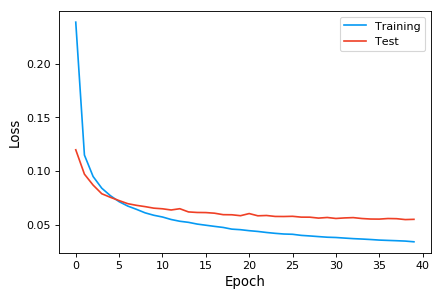

In [183]:
#LOSS
plt.figure(dpi=80)
plt.plot(hist51.epoch,hist51.history['loss'],label='Training',c='xkcd:azure')
plt.plot(hist51.epoch,hist51.history['val_loss'],label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend()
plt.savefig("1-5-1_loss.png",dpi=300)

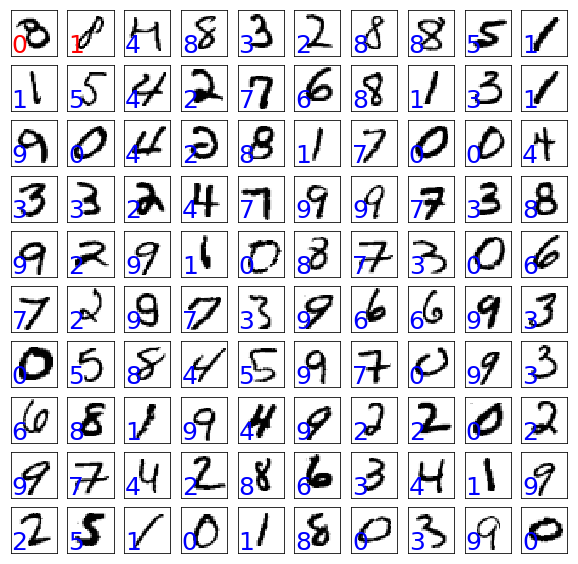

In [184]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.savefig("1-5-1_numbers.png",dpi=300)


## variation 2 - Big dense layer with dropouts after last Conv

In [20]:
from keras.layers import Dropout,GlobalAveragePooling2D
from keras.regularizers import l2
from keras.optimizers import Adadelta,Adagrad

In [21]:
clear_session()

In [22]:
model52 = Sequential()
model52.add(InputLayer((28,28,1)))
model52.add(Conv2D(filters=8,kernel_size=3,padding='same',strides=1,kernel_regularizer=l2()))
model52.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model52.add(Activation('relu'))
model52.add(Conv2D(filters=16,kernel_size=3,padding='same',strides=1,kernel_regularizer=l2()))
model52.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model52.add(Activation('relu'))
model52.add(Conv2D(filters=32,kernel_size=3,padding='same',strides=1,kernel_regularizer=l2()))
model52.add(Activation('relu'))
model52.add(Flatten())
model52.add(Dense(400))
model52.add(Activation('relu'))
model52.add(Dense(10, activation = 'softmax'))

model52.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          4640      
__________

In [187]:
model52.compile(loss='categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy'])
hist52 = model52.fit(X_train_2d, Y_train, epochs=40, batch_size=100,validation_data=[X_test_2d,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 8s 130us/step - loss: 0.4915 - acc: 0.8855 - val_loss: 0.3140 - val_acc: 0.9425
Epoch 2/40
60000/60000 [==============================] - 6s 96us/step - loss: 0.3060 - acc: 0.9429 - val_loss: 0.2726 - val_acc: 0.9515
Epoch 3/40
60000/60000 [==============================] - 6s 95us/step - loss: 0.2718 - acc: 0.9516 - val_loss: 0.2599 - val_acc: 0.9537
Epoch 4/40
60000/60000 [==============================] - 6s 100us/step - loss: 0.2527 - acc: 0.9557 - val_loss: 0.2356 - val_acc: 0.9610
Epoch 5/40
60000/60000 [==============================] - 6s 98us/step - loss: 0.2387 - acc: 0.9593 - val_loss: 0.2262 - val_acc: 0.9616
Epoch 6/40
60000/60000 [==============================] - 7s 111us/step - loss: 0.2286 - acc: 0.9609 - val_loss: 0.2146 - val_acc: 0.9633
Epoch 7/40
60000/60000 [==============================] - 6s 99us/step - loss: 0.2205 - acc: 0.9628 - val_loss: 0.2075 - val_

In [189]:
print('Accuracy on TEST data\n')
score52 = model52.evaluate(X_test_2d, Y_test) 
predictions = model52.predict(X_test_2d)
print('loss ', score52[0])
print('Accuracy ', score52[1])

Accuracy on TEST data

10000/10000 [==============================] - 1s 112us/step
loss  0.15042434747219086
Accuracy  0.975


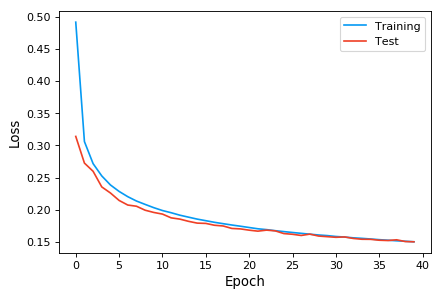

In [190]:
#LOSS
plt.figure(dpi=80)
plt.plot(hist52.epoch,hist52.history['loss'],label='Training',c='xkcd:azure')
plt.plot(hist52.epoch,hist52.history['val_loss'],label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend()
plt.savefig("1-5-2_loss.png",dpi=300)

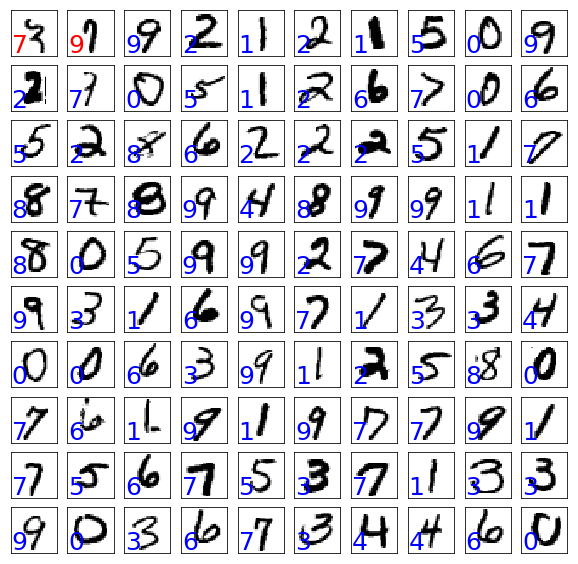

In [191]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.savefig("1-5-2_numbers.png",dpi=300)


## variation 3 - BatchNormalization before each Conv + Big dense layer with dropout

In [23]:
model53 = Sequential()
model53.add(InputLayer((28,28,1)))
model53.add(BatchNormalization())
model53.add(Conv2D(filters=8,kernel_size=3,padding='same',strides=1,kernel_regularizer=l2()))
model53.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model53.add(Activation('relu'))
model53.add(BatchNormalization())
model53.add(Conv2D(filters=16,kernel_size=3,padding='same',strides=1,kernel_regularizer=l2()))
model53.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='same'))
model53.add(Activation('relu'))
model53.add(BatchNormalization())
model53.add(Conv2D(filters=32,kernel_size=3,padding='same',strides=1,kernel_regularizer=l2()))
model53.add(Activation('relu'))
model53.add(Flatten())
model53.add(BatchNormalization())
model53.add(Dense(400,kernel_regularizer=l2()))
model53.add(Activation('relu'))
model53.add(Dense(10, activation = 'softmax'))

model53.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
activation_5 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
__________

In [98]:
model53.compile(loss='categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy'])
hist53 = model53.fit(X_train_2d, Y_train, epochs=50, batch_size=50,validation_data=[X_test_2d,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 21s 344us/step - loss: 0.5737 - acc: 0.9381 - val_loss: 0.2566 - val_acc: 0.9666
Epoch 2/50
60000/60000 [==============================] - 19s 318us/step - loss: 0.2411 - acc: 0.9656 - val_loss: 0.1978 - val_acc: 0.9734
Epoch 3/50
60000/60000 [==============================] - 18s 297us/step - loss: 0.1963 - acc: 0.9708 - val_loss: 0.1681 - val_acc: 0.9753
Epoch 4/50
60000/60000 [==============================] - 15s 254us/step - loss: 0.1710 - acc: 0.9740 - val_loss: 0.1489 - val_acc: 0.9777
Epoch 5/50
60000/60000 [==============================] - 15s 252us/step - loss: 0.1543 - acc: 0.9758 - val_loss: 0.1386 - val_acc: 0.9785
Epoch 6/50
60000/60000 [==============================] - 17s 284us/step - loss: 0.1411 - acc: 0.9780 - val_loss: 0.1272 - val_acc: 0.9801
Epoch 7/50
60000/60000 [==============================] - 21s 349us/step - loss: 0.1322 - acc: 0.9793 - val_loss: 0.

In [99]:
print('Accuracy on TEST data\n')
score53 = model53.evaluate(X_test_2d, Y_test) 
predictions = model53.predict(X_test_2d)
print('loss ', score53[0])
print('Accuracy ', score53[1])

Accuracy on TEST data

10000/10000 [==============================] - 1s 126us/step
loss  0.07039129666686059
Accuracy  0.985


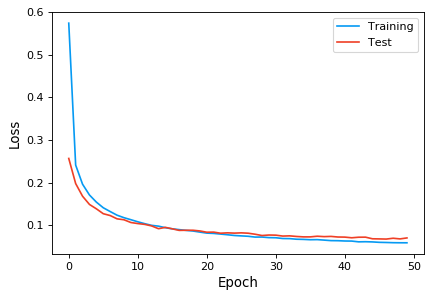

In [100]:
#LOSS
plt.figure(dpi=80)
plt.plot(hist53.epoch,hist53.history['loss'],label='Training',c='xkcd:azure')
plt.plot(hist53.epoch,hist53.history['val_loss'],label='Test',c='xkcd:tomato')
plt.ylabel('Loss',fontsize=12)
plt.xlabel('Epoch',fontsize=12)
plt.legend()
plt.savefig("1-5-3_loss.png",dpi=300)

In [101]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,100)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    plt.subplot(num_rows, num_cols, i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
    if test_pred[i_im]==test_true[i_im]:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='blue')
    else:
          plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.savefig("1-5-3_numbers.png",dpi=300)


In [112]:
#converting
test_pred = np.argmax(predictions,axis=1)
test_true = np.argmax(Y_test,axis=1)
test_size = len(test_true)
test_data = np.array(X_test).reshape((10000, 28, 28, 1))

# Extract 100 random test images
batch_test_ind = np.random.choice(test_size,3000)
batch_test_ind_wrong_first = batch_test_ind[np.argsort(test_true[batch_test_ind]==test_pred[batch_test_ind])]

# Do the plot of the images
num_rows = 3
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(num_cols, num_rows))

for i, i_im in enumerate(batch_test_ind_wrong_first, 1):
    if test_pred[i_im]!=test_true[i_im] and i<31:
        plt.subplot(num_rows, num_cols, i)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_data[i_im,:,:,0], cmap=plt.cm.binary)    
        plt.text(0, 25, test_pred[i_im], fontsize=25, color='red')    
                  
plt.savefig("1-5-3-errors_numbers.png",dpi=300)


In [125]:
from sklearn.metrics import confusion_matrix

In [126]:
CM=confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(predictions,axis=1))

In [127]:
print(CM)

[[ 972    0    0    0    1    0    2    1    3    1]
 [   0 1129    1    0    0    1    1    1    2    0]
 [   1    0 1019    5    1    0    1    4    1    0]
 [   0    0    3  999    0    3    0    4    1    0]
 [   0    0    3    0  971    0    1    1    1    5]
 [   3    0    0    7    0  870    4    2    3    3]
 [   8    3    3    0    4    2  935    0    3    0]
 [   0    2    4    1    0    1    0 1019    0    1]
 [   5    1    2    2    1    1    1    2  955    4]
 [   0    5    2    1    9    1    0    6    4  981]]
